Necessary Libraries

In [1]:
from skimage.io import imread
from skimage.color import rgb2hsv
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

c:\Users\jangj\anaconda3\envs\JJ\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Hue color palette finder for NON RESIZE IMAGE (does not use cv2.resize from cv2 function)

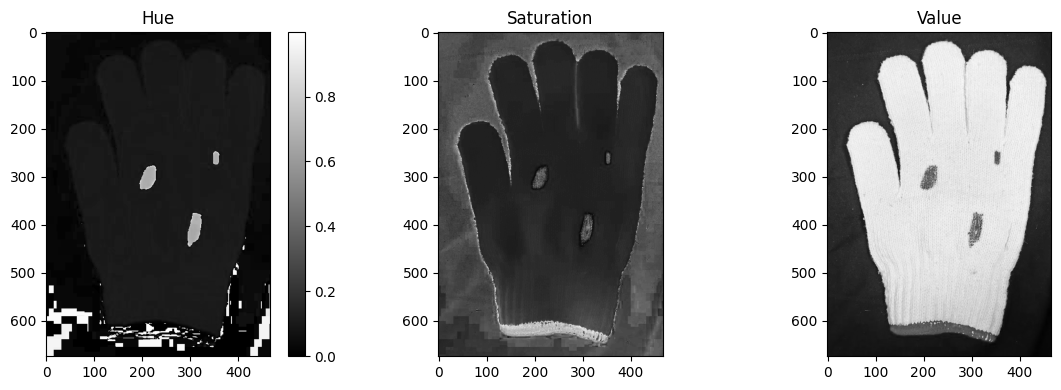

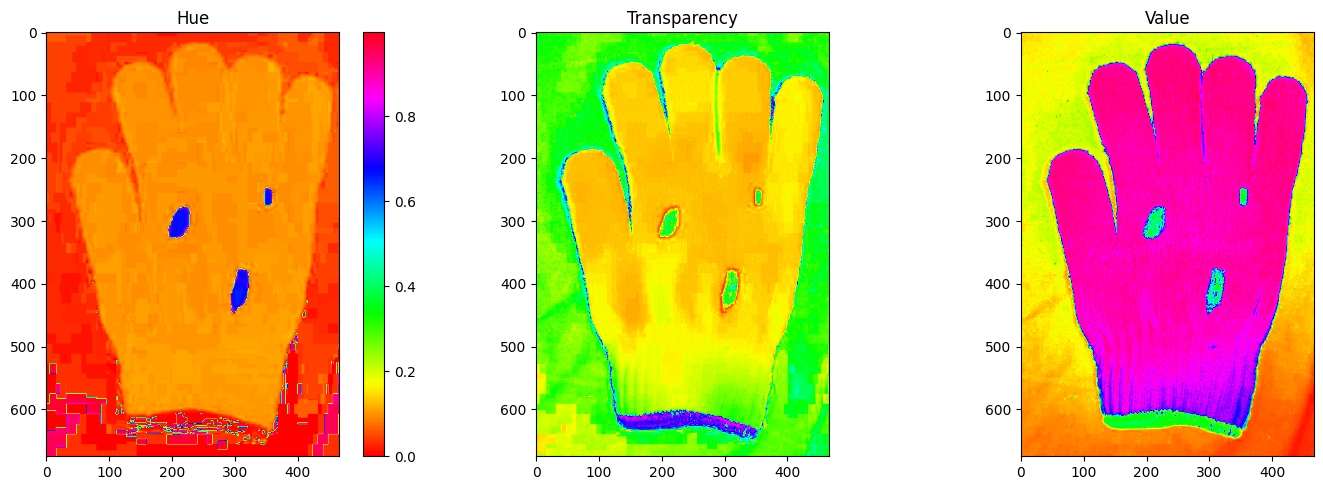

In [24]:
def visualize_hsv_channels(image):
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    channel_titles = ['Hue', 'Saturation', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='gray')
        ax[i].set_title(title)
        
    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='gray'))
    fig.tight_layout()
    
    plt.show()

def visualize_hsv_colormap(image):
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    channel_titles = ['Hue', 'Transparency', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='hsv')
        ax[i].set_title(title)

    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='hsv'))
    fig.tight_layout()

    plt.show()

# Load the image and visualize the HSV channels
img = imread("C:\\Users\\jangj\\OneDrive\\Desktop\\Glove-Defect-Detection-System\\Images\\Cloth\\CLOTH STAIN 1.jpg")
visualize_hsv_channels(img)
visualize_hsv_colormap(img)

Hue color palette finder for RESIZE IMAGE (does use cv2.resize from cv2 function)

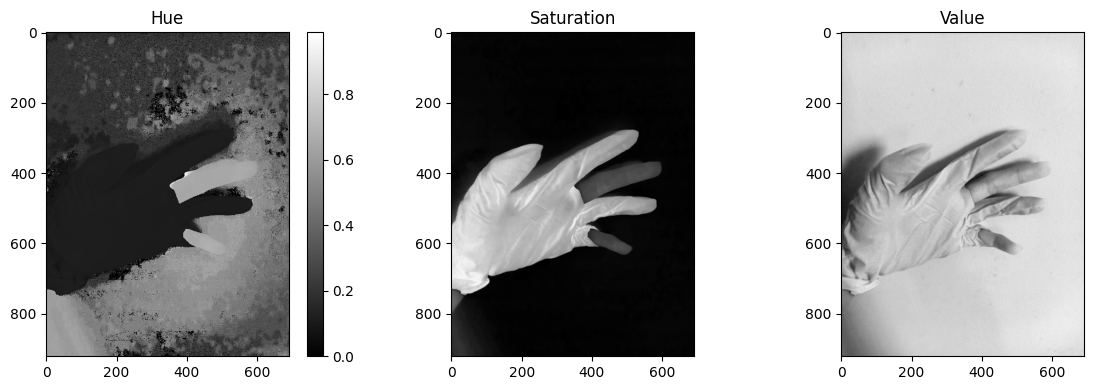

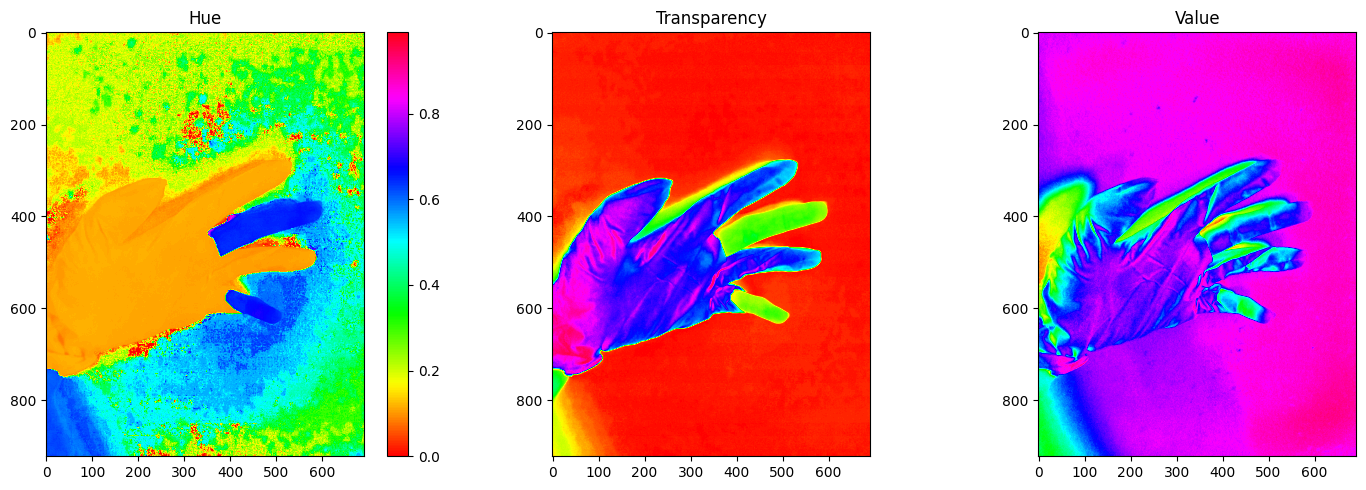

In [3]:
def visualize_hsv_channels(image):
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    channel_titles = ['Hue', 'Saturation', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='gray')
        ax[i].set_title(title)
        
    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='gray'))
    fig.tight_layout()
    
    plt.show()

def visualize_hsv_colormap(image):
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    channel_titles = ['Hue', 'Transparency', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='hsv')
        ax[i].set_title(title)

    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='hsv'))
    fig.tight_layout()

    plt.show()

# Load the image and visualize the HSV channels
image = cv.imread("C:\\Users\\jangj\\OneDrive\\Desktop\\Glove-Defect-Detection-System\\Images\\Latex\\missing_finger.jpg")
new_img = cv.resize(image, None, fx=0.2, fy=0.2)
visualize_hsv_channels(new_img)
visualize_hsv_colormap(new_img)

Method to test whether, stain are segmented properly (NON-RESIZED IMAGE ONLY)

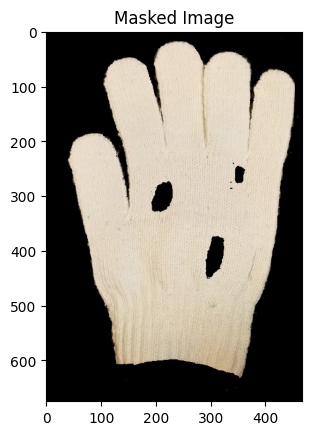

In [27]:
def apply_mask(lower_hue, upper_hue, saturation_threshold):
    hsv_image = rgb2hsv(img)

    lower_mask = hsv_image[..., 0] > lower_hue
    upper_mask = hsv_image[..., 0] < upper_hue
    saturation_mask = hsv_image[..., 1] > saturation_threshold

    mask = np.logical_and.reduce((lower_mask, upper_mask, saturation_mask))
    masked_image = img * np.expand_dims(mask, axis=2)

    plt.imshow(masked_image)
    plt.title("Masked Image")
    plt.show()
apply_mask(0.08, 0.2, 0.1) # adjust accordingly based on ur 

Method to test whether, stain are segmented properly (RESIZED IMAGE ONLY)

In [23]:
def apply_mask(lower_hue, upper_hue, saturation_threshold):
    image = cv.imread("C:\\Users\\jangj\\OneDrive\\Desktop\\Glove-Defect-Detection-System\\Images\\Latex\\missing_finger.jpg")
    new_img = cv.resize(image, None, fx=0.2, fy=0.2)
    hsv_image = rgb2hsv(new_img)

    lower_mask = hsv_image[..., 0] > lower_hue
    upper_mask = hsv_image[..., 0] < upper_hue
    saturation_mask = hsv_image[..., 1] > saturation_threshold

    mask = np.logical_and.reduce((lower_mask, upper_mask, saturation_mask))
    masked_image = new_img * np.expand_dims(mask, axis=2)

    cv.imshow("Masked Image", masked_image)
    cv.waitKey(0)
    cv.destroyAllWindows()
apply_mask(0.1, 0.2, .5)

In [39]:
import cv2
import numpy as np

# Read the input image
image = cv2.imread('C:\\Users\\jangj\\OneDrive\\Desktop\\Glove-Defect-Detection-System\\Images\\Latex\\missing_finger.jpg')
image = cv2.resize(image, None, fx=0.2, fy=0.2)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_color = np.array([89, 20, 145], dtype=np.uint8)
upper_color = np.array([107, 255, 255], dtype=np.uint8)

mask = cv2.inRange(hsv, lower_color, upper_color)
blur = cv2.GaussianBlur(mask, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    for point in approx:
        x, y = point.ravel()
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
        print(point)

cv2.imshow('Result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[ 42 697]]
[[ 42 700]]
[[ 45 700]]
[[ 45 698]]
[[ 44 697]]
[[ 78 692]]
[[ 77 694]]
[[ 78 695]]
[[ 77 697]]
[[ 77 702]]
[[ 78 705]]
[[ 82 705]]
[[ 82 695]]
[[ 80 692]]
[[  0 689]]
[[  8 691]]
[[ 12 694]]
[[  9 696]]
[[  1 692]]
[[  0 693]]
[[ 12 696]]
[[ 11 692]]
[[ 51 651]]
[[ 51 652]]
[[ 50 653]]
[[ 49 652]]
[[ 49 653]]
[[ 51 653]]
[[ 42 641]]
[[ 32 654]]
[[ 27 651]]
[[ 24 662]]
[[ 36 684]]
[[ 41 671]]
[[ 40 658]]
[[ 49 648]]
[[420 610]]
[[106 693]]
[[ 41 749]]
[[  0 731]]
[[ 41 749]]
[[107 693]]
[[ 31 572]]
[[ 31 573]]
[[ 33 571]]
[[ 34 572]]
[[ 36 569]]
[[ 38 569]]
[[ 35 569]]
[[ 34 572]]
[[ 33 568]]
[[ 35 566]]
[[ 40 568]]
[[ 37 566]]
[[ 34 566]]
[[ 33 567]]
[[ 42 564]]
[[ 42 565]]
[[ 40 540]]
[[ 37 544]]
[[ 46 563]]
[[ 40 571]]
[[ 42 575]]
[[ 46 563]]
[[ 39 548]]
[[ 42 544]]
[[ 38 544]]
[[ 24 539]]
[[  8 570]]
[[ 28 629]]
[[ 14 635]]
[[  0 617]]
[[ 13 635]]
[[ 28 623]]
[[ 11 558]]
[[ 23 539]]
[[ 26 573]]
[[ 42 581]]
[[ 25 570]]
[[ 38 538]]
[[ 37 538]]
[[ 37 539]]
[[455 505]]
[[45